#**Activity 4 - Part 2 and Part 3**
Part #2: Linear Regression

Part #3: Model Dumping 

***Group 4***

*Fagarita, Dave*

*Servandil, Jimuel*

*Magno, Jannica Mae*

*Catanus, Jeziah Lois*

In [66]:
import pandas as pd
import numpy as np
import re

In [67]:
# Read the CSV file that was scraped from indeed page 
df = pd.read_csv('Job_data.csv')
df

,Job,Location,Salary,Experience,Job_Pos
0,Junior Graphics Designer,Remote,"Php20,000.00 -Php30,000.00",At least 1 year,Junior
1,Junior Product Designer,Philippines,PHP30K,1-2 years,Junior
2,Junior Services Developer - Javascript (100% R...,Remote,"PHP 32,000 - PHP 57,000",20 years,Junior
3,Junior Software Engineers,Remote in Makati,NaN,Minimum 1-2 years,Junior
4,Junior Enterprise Growth Consultant (Work From...,Remote,"Php50,000.00 -Php70,000.00",Minimum 1-2 years,Junior
...,...,...,...,...,...
295,Chief Technology Officer | Flexible Shift - Pe...,Remote in Makati,"Php150,000.00 -Php200,000.00",5 years,CTO
296,Senior Web Developer,Remote in Manila,"Php80,000.00 -Php100,000.00",NaN,CTO
297,HEAD OF THE SOFTWARE DEVELOPMENT TEAM,Taguig,"Php150,000.00 -Php200,000.00",7 years,CTO
298,Chief Technology Officer,Taguig,NaN,NaN,CTO


# **Data Preprocessing**
Employing data cleaning process in data mining for normalizing and making the scraped data consistent, and makit it free from noise, outliers, and null values.

**Salary data preprocessing**

In [68]:
# Since the scraped data have inconsistent currency indicator, there is a need for transformation.
# Scraped Salaries are in monthly format and luckily, all data are set by monthly.
df['Salary'] = df['Salary'].str.replace('K.*', 'K')
df['Salary'] = df['Salary'].str.replace('K', '000')
df['Salary'] = df['Salary'].str.replace(r'(Php.*?){3}', r'\1', regex=True)
df['Salary'] = df['Salary'].str.replace('[^-\d,.]', '', regex=True)
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace(r'(\d+)(\d{6})', r'\1-\2')

# Split the Salary column into two separate columns for extracting the range values
df[['Lower Salary', 'Upper Salary']] = df['Salary'].str.split('-', expand=True)

# Convert the Lower Salary and Upper Salary columns to float data type for consistent data type
df['Lower Salary'] = df['Lower Salary'].str.strip().replace('', 0).astype(float)
df['Upper Salary'] = df['Upper Salary'].str.strip().replace('', 0).astype(float)

# Filling null values with temporary placeholder in order to get the average of ranged values
df['Lower Salary'] = df['Lower Salary'].fillna(0)
df['Upper Salary'] = df['Upper Salary'].fillna(0)

# Check if either Lower Salary or Upper Salary is 0
mask = (df['Lower Salary'] == 0) | (df['Upper Salary'] == 0)

# Create new column named new salary to calculate the ranged values
df['New Salary'] = np.where(mask, df['Lower Salary'] + df['Upper Salary'], (df['Lower Salary'] + df['Upper Salary']) / 2)

C:\Users\Ayooo\AppData\Local\Temp\ipykernel_14828\2756910847.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary'] = df['Salary'].str.replace('K.*', 'K')
C:\Users\Ayooo\AppData\Local\Temp\ipykernel_14828\2756910847.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary'] = df['Salary'].str.replace(r'(\d+)(\d{6})', r'\1-\2')


In [69]:
df

,Job,Location,Salary,Experience,Job_Pos,Lower Salary,Upper Salary,New Salary
0,Junior Graphics Designer,Remote,20000.00-30000.00,At least 1 year,Junior,20000.0,30000.0,25000.0
1,Junior Product Designer,Philippines,30000,1-2 years,Junior,30000.0,0.0,30000.0
2,Junior Services Developer - Javascript (100% R...,Remote,32000-57000,20 years,Junior,32000.0,57000.0,44500.0
3,Junior Software Engineers,Remote in Makati,NaN,Minimum 1-2 years,Junior,0.0,0.0,0.0
4,Junior Enterprise Growth Consultant (Work From...,Remote,50000.00-70000.00,Minimum 1-2 years,Junior,50000.0,70000.0,60000.0
...,...,...,...,...,...,...,...,...
295,Chief Technology Officer | Flexible Shift - Pe...,Remote in Makati,150000.00-200000.00,5 years,CTO,150000.0,200000.0,175000.0
296,Senior Web Developer,Remote in Manila,80000.00-100000.00,NaN,CTO,80000.0,100000.0,90000.0
297,HEAD OF THE SOFTWARE DEVELOPMENT TEAM,Taguig,150000.00-200000.00,7 years,CTO,150000.0,200000.0,175000.0
298,Chief Technology Officer,Taguig,NaN,NaN,CTO,0.0,0.0,0.0


**Experience data preprocessing**

In [70]:
# We will remove non-numeric characters from the 'Experience' column
df['Experience'] = df['Experience'].str.replace('[^-\d,.]', '', regex=True)

# Then, calculate the average of the minimum and maximum values
df['Experience'] = df['Experience'].str.split('-', expand=True).apply(pd.to_numeric).mean(axis=1)

 **Position/Job Preprocessing**

In [71]:
# Changing the categorical values in Position column into numerical format
df['Job_Pos'] = df['Job_Pos'].map({'Junior': 1, 'Senior': 2, 'Project+Manager': 3, 'CTO': 4})

In [72]:
# Check the initial preprocessed data by displaying the columns
slice_df = df
slice_df

,Job,Location,Salary,Experience,Job_Pos,Lower Salary,Upper Salary,New Salary
0,Junior Graphics Designer,Remote,20000.00-30000.00,1.0,1,20000.0,30000.0,25000.0
1,Junior Product Designer,Philippines,30000,1.5,1,30000.0,0.0,30000.0
2,Junior Services Developer - Javascript (100% R...,Remote,32000-57000,20.0,1,32000.0,57000.0,44500.0
3,Junior Software Engineers,Remote in Makati,NaN,1.5,1,0.0,0.0,0.0
4,Junior Enterprise Growth Consultant (Work From...,Remote,50000.00-70000.00,1.5,1,50000.0,70000.0,60000.0
...,...,...,...,...,...,...,...,...
295,Chief Technology Officer | Flexible Shift - Pe...,Remote in Makati,150000.00-200000.00,5.0,4,150000.0,200000.0,175000.0
296,Senior Web Developer,Remote in Manila,80000.00-100000.00,NaN,4,80000.0,100000.0,90000.0
297,HEAD OF THE SOFTWARE DEVELOPMENT TEAM,Taguig,150000.00-200000.00,7.0,4,150000.0,200000.0,175000.0
298,Chief Technology Officer,Taguig,NaN,NaN,4,0.0,0.0,0.0


## **Remove Outliers**

In [73]:
#Initial removal of outliers
def remove_outliers(df, column_name):
    # Calculate the IQR and bounds for the specified column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Remove outliers from the specified column
    df = df[((df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)) | (df[column_name].isnull())]
    
    return df

In [74]:
slice_df = remove_outliers(slice_df, 'Experience')
slice_df = remove_outliers(slice_df, 'New Salary')

In [75]:
slice_df = slice_df.dropna(subset=['Experience', 'New Salary'], how='all')

In [76]:
# Replacing back from 0 to NaN so that it can be imputed using linear regression
slice_df['New Salary'] = slice_df['New Salary'].replace(0.0, np.nan)

In [77]:
slice_df

,Job,Location,Salary,Experience,Job_Pos,Lower Salary,Upper Salary,New Salary
0,Junior Graphics Designer,Remote,20000.00-30000.00,1.0,1,20000.0,30000.0,25000.0
1,Junior Product Designer,Philippines,30000,1.5,1,30000.0,0.0,30000.0
3,Junior Software Engineers,Remote in Makati,NaN,1.5,1,0.0,0.0,NaN
4,Junior Enterprise Growth Consultant (Work From...,Remote,50000.00-70000.00,1.5,1,50000.0,70000.0,60000.0
5,Junior Operations Associate,Remote in Manila,28000-53000,1.5,1,28000.0,53000.0,40500.0
...,...,...,...,...,...,...,...,...
295,Chief Technology Officer | Flexible Shift - Pe...,Remote in Makati,150000.00-200000.00,5.0,4,150000.0,200000.0,175000.0
296,Senior Web Developer,Remote in Manila,80000.00-100000.00,NaN,4,80000.0,100000.0,90000.0
297,HEAD OF THE SOFTWARE DEVELOPMENT TEAM,Taguig,150000.00-200000.00,7.0,4,150000.0,200000.0,175000.0
298,Chief Technology Officer,Taguig,NaN,NaN,4,0.0,0.0,NaN


In [78]:
slice_df = slice_df.drop(['Job', 'Location', 'Salary', 'Upper Salary', 'Lower Salary'], axis=1)
slice_df

,Experience,Job_Pos,New Salary
0,1.0,1,25000.0
1,1.5,1,30000.0
3,1.5,1,NaN
4,1.5,1,60000.0
5,1.5,1,40500.0
...,...,...,...
295,5.0,4,175000.0
296,NaN,4,90000.0
297,7.0,4,175000.0
298,NaN,4,NaN


## **Missing Value Imputation using Linear Regression**

In [79]:
from sklearn.linear_model import LinearRegression

# Select the required columns to impute values with null value present
df = slice_df

# Impute missing values for 'New Salary' column
new_salary_missing = df['New Salary'].isnull()
if new_salary_missing.sum() > 0:
    # Separate the rows with valid 'New Salary' values
    df_valid = df.loc[~new_salary_missing]
    # Train a linear regression model for 'New Salary' column
    regressor_new_salary = LinearRegression()
    regressor_new_salary.fit(df_valid[['Job_Pos']], df_valid['New Salary'])
    # Impute missing 'New Salary' values using the trained model
    df.loc[new_salary_missing, 'New Salary'] = regressor_new_salary.predict(df.loc[new_salary_missing, ['Job_Pos']])

# Impute missing values for 'Experience' column
experience_missing = df['Experience'].isnull()
if experience_missing.sum() > 0:
    df_valid = df.loc[~experience_missing]
    regressor_experience = LinearRegression()
    regressor_experience.fit(df_valid[['Job_Pos']], df_valid['Experience'])
    df.loc[experience_missing, 'Experience'] = regressor_experience.predict(df.loc[experience_missing, ['Job_Pos']])
    df['Experience'] = df['Experience'].round(1)

# Update the original DataFrame with imputed values
slice_df[['New Salary', 'Experience']] = df[['New Salary', 'Experience']]

In [80]:
slice_df

,Experience,Job_Pos,New Salary
0,1.0,1,25000.000000
1,1.5,1,30000.000000
3,1.5,1,49804.276271
4,1.5,1,60000.000000
5,1.5,1,40500.000000
...,...,...,...
295,5.0,4,175000.000000
296,6.2,4,90000.000000
297,7.0,4,175000.000000
298,6.2,4,133952.238342


In [81]:
# Saving our preprocessed dataset into csv for further analysis and prediction purposes 
slice_df.to_csv('Clean_Job_data.csv', index = False)

# **Linear Regression with Cleaned Scraped Dataset from Indeed Website**

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
df1 = pd.read_csv('Clean_Job_data.csv')

In [84]:
#Remove outliers again
df1 = remove_outliers(df1, 'Experience')
df1 = remove_outliers(df1, 'New Salary')

In [85]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Apply the scaler to the 'New Salary' column
# df1['New Salary'] = scaler.fit_transform(df1['New Salary'].values.reshape(-1, 1))

# # Print the normalized data
# print(df1)

In [86]:
df1

,Experience,Job_Pos,New Salary
0,1.0,1,25000.000000
1,1.5,1,30000.000000
2,1.5,1,49804.276271
3,1.5,1,60000.000000
4,1.5,1,40500.000000
...,...,...,...
279,5.0,4,175000.000000
280,6.2,4,90000.000000
281,7.0,4,175000.000000
282,6.2,4,133952.238342


In [87]:
X = df1.iloc[:, :2]
y = df1.iloc[:,-1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

In [89]:
X_train = np.array(X_train).reshape((len(X_train), 2))
y_train = np.array(y_train).reshape((len(y_train), 1))

X_test = np.array(X_test).reshape(len(X_test), 2)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [90]:
from sklearn import linear_model

In [91]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
model.intercept_

array([21234.22091612])

In [93]:
model.coef_

array([[-1803.76984575, 31691.25412924]])

In [94]:
model.score(X_train, y_train)

0.8034612959926593

In [95]:
y_pred = model.predict(X_test)

In [96]:
df1

,Experience,Job_Pos,New Salary
0,1.0,1,25000.000000
1,1.5,1,30000.000000
2,1.5,1,49804.276271
3,1.5,1,60000.000000
4,1.5,1,40500.000000
...,...,...,...
279,5.0,4,175000.000000
280,6.2,4,90000.000000
281,7.0,4,175000.000000
282,6.2,4,133952.238342


In [97]:
# Analysis Variance of the model
import statsmodels.api as sm

# Using ANOVA to analyse the model variance 
X_tests = sm.add_constant(X_test)
anova_model = sm.OLS(y_test, X_tests)
results = anova_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     59.33
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.80e-15
Time:                        21:31:06   Log-Likelihood:                -784.02
No. Observations:                  69   AIC:                             1574.
Df Residuals:                      66   BIC:                             1581.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.802e+04   6225.661      4.501      0.0

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

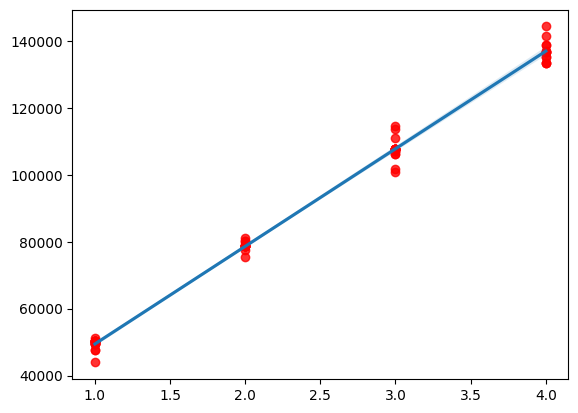

In [99]:
plt.figure(10.5)
sns.regplot(x=X_test[:, 1], y=y_pred, scatter_kws={'color': 'red'})
plt.show()

# **Model Dumping using Pickle**

In [100]:
import pickle

In [101]:
pickle.dump(model, open('linreg_model.pkl', 'wb'))

In [102]:
model_dump = pickle.load(open('linreg_model.pkl', 'rb'))

In [103]:
print(model.predict([[1.2, 100]]))

[[3188195.11002543]]


In [104]:
import sklearn
print(sklearn.__version__)

1.2.2
